<a href="https://colab.research.google.com/github/sahithi0624/winter-internship/blob/main/week3/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. How to load data?
2. How to work on csv / tsv file?
3. Basic Statistics on Data.
4. Data Cleaning with each column.
5. Choice description
6. Regular Expression
7. Solve some questions from dataset.

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [ ]:
data = pd.read_csv("/content/Data-cleaning-for-beginners-using-pandas.csv")


In [ ]:
data.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


In [ ]:
data.tail()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
24,24,13.0,$44k-$99k,-1.0,"New York,Ny",1987,-1
25,25,55.0,$44k-$99k,0.0,Australia Aus,1980,TRUE
26,26,NaN,$55k-$66k,NaN,"India,In",1934,TRUE
27,27,52.0,$44k-$99k,5.4,"India,In",1935,-1
28,28,NaN,$39k-$88k,3.4,Australia Aus,1932,-1


In [ ]:
data.shape

(29, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        29 non-null     int64  
 1   Age          22 non-null     float64
 2   Salary       29 non-null     object 
 3   Rating       28 non-null     float64
 4   Location     29 non-null     object 
 5   Established  29 non-null     int64  
 6   Easy Apply   29 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ KB


Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


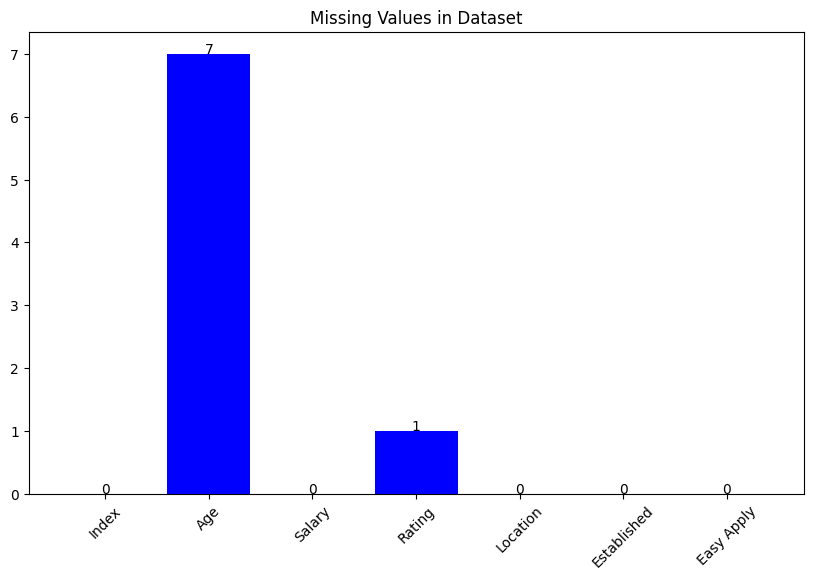

In [ ]:
missing_val = data.isnull().sum()
print(missing_val)

plt.figure(figsize=(10,6))
bars = plt.bar(missing_val.index, missing_val, color='blue')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center')
plt.title('Missing Values in Dataset')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_types = data.dtypes
print(data_types)

Index            int64
Age            float64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object


40-100

40000-100000

## Age column

In [ ]:
avg_age = data['Age'].mean()
avg_age

39.04545454545455

In [ ]:
# fill the missing values with mean
data['Age'] = data.Age.fillna(avg_age)
data['Age'] = data.Age.round(decimals=1)

In [ ]:
data.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,39.0,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


In [ ]:
data['Age']

0     44.0
1     66.0
2     39.0
3     64.0
4     25.0
5     44.0
6     21.0
7     44.0
8     35.0
9     22.0
10    55.0
11    44.0
12    39.0
13    25.0
14    66.0
15    44.0
16    19.0
17    39.0
18    35.0
19    32.0
20    39.0
21    35.0
22    19.0
23    39.0
24    13.0
25    55.0
26    39.0
27    52.0
28    39.0
Name: Age, dtype: float64

<Axes: >

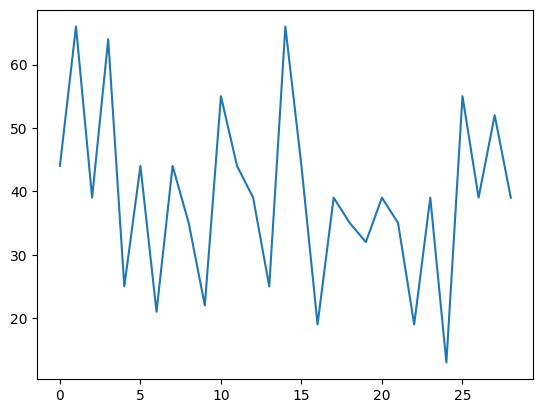

In [ ]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
data['Age'].plot(kind='line')

Replace

In [ ]:
print(data['Salary'].head())

0    $44k-$99k
1    $55k-$66k
2    $77k-$89k
3    $44k-$99k
4    $44k-$99k
Name: Salary, dtype: object


In [ ]:
data['Salary'] = data['Salary'].str.replace('[$,k]', '', regex=True)
data[['Min Salary', 'Max Salary']] = data['Salary'].str.split('-', expand=True)
data['Min Salary'] = data['Min Salary'].astype(int)
data['Max Salary'] = data['Max Salary'].astype(int)

data['Average Salary'] = (data['Min Salary'] + data['Max Salary']) / 2

print("\nCleaned and formatted dataset:")
print(data[['Salary', 'Min Salary', 'Max Salary', 'Average Salary']].head())


Cleaned and formatted dataset:
  Salary  Min Salary  Max Salary  Average Salary
0  44-99          44          99            71.5
1  55-66          55          66            60.5
2  77-89          77          89            83.0
3  44-99          44          99            71.5
4  44-99          44          99            71.5


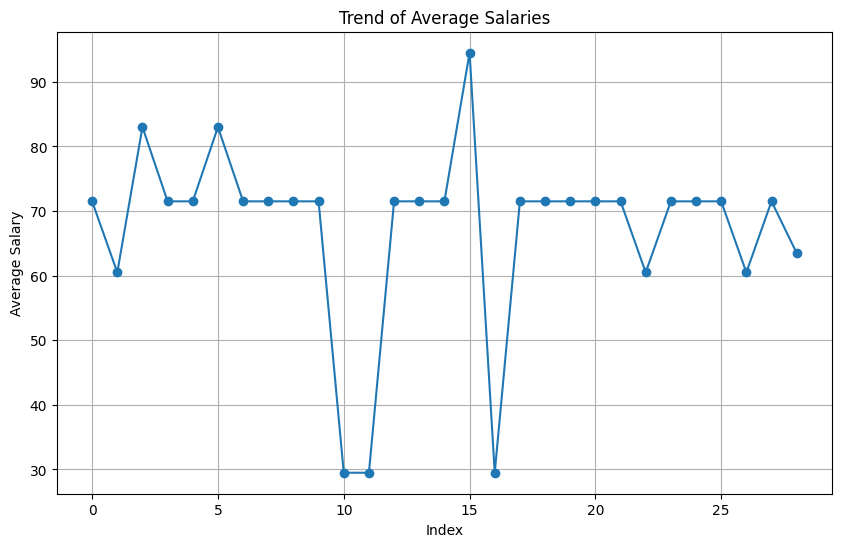

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Average Salary'], marker='o', linestyle='-')
plt.title('Trend of Average Salaries')
plt.xlabel('Index')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

In [ ]:
print(data['Location'].head(10))

0         India,In
1      New York,Ny
2      New York,Ny
3         India In
4    Australia Aus
5         India,In
6      New York,Ny
7    Australia Aus
8      New York,Ny
9         India,In
Name: Location, dtype: object


In [ ]:
def standardize_location(location):
    mapping = {
        'India,In': 'India',
        'India In': 'India',
        'New York,Ny': 'New York',
        'Australia Aus': 'Australia'

    }
    return mapping.get(location, location)

data['Standardized Location'] = data['Location'].apply(standardize_location)
print(data[['Location', 'Standardized Location']].head(10))

        Location Standardized Location
0       India,In                 India
1    New York,Ny              New York
2    New York,Ny              New York
3       India In                 India
4  Australia Aus             Australia
5       India,In                 India
6    New York,Ny              New York
7  Australia Aus             Australia
8    New York,Ny              New York
9       India,In                 India


In [ ]:
data['Established'] = data['Established'].replace(-1, np.nan)
print(data['Established'])

0     1999.0
1     2002.0
2        NaN
3     1988.0
4     2002.0
5     1999.0
6        NaN
7        NaN
8        NaN
9        NaN
10    2008.0
11    2009.0
12    1999.0
13    2019.0
14    2020.0
15    1999.0
16    1984.0
17    1943.0
18    1954.0
19    1955.0
20    1944.0
21    1946.0
22    1988.0
23    1999.0
24    1987.0
25    1980.0
26    1934.0
27    1935.0
28    1932.0
Name: Established, dtype: float64


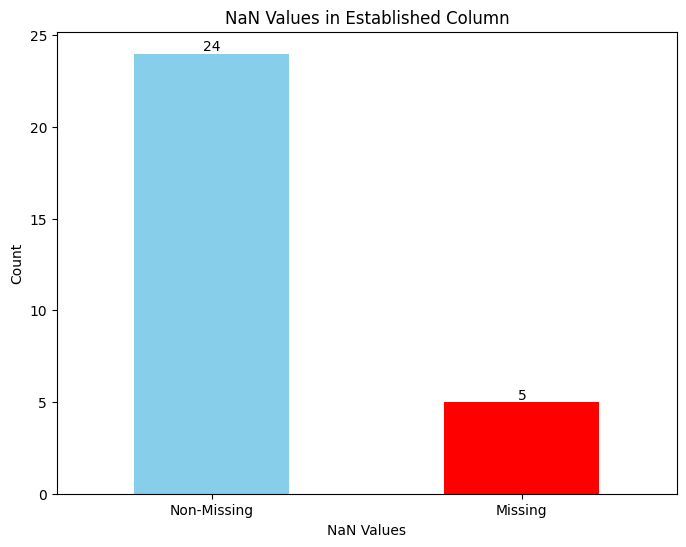

In [ ]:
value_counts = data['Established'].isna().value_counts()
plt.figure(figsize=(8, 6))
bars = value_counts.plot(kind='bar', color=['skyblue', 'red'])
plt.title('NaN Values in Established Column')
plt.xlabel('NaN Values')
plt.ylabel('Count')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom')

plt.xticks([0, 1], ['Non-Missing', 'Missing'], rotation=0)
plt.show()


In [ ]:
replacement_dict = {'TRUE': True, '-1': False}
data['Easy Apply'] = data['Easy Apply'].replace(replacement_dict)
data['Easy Apply'] = data['Easy Apply'].astype(bool)
print(data['Easy Apply'])

0      True
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15    False
16    False
17     True
18     True
19     True
20     True
21    False
22     True
23     True
24    False
25     True
26     True
27    False
28    False
Name: Easy Apply, dtype: bool


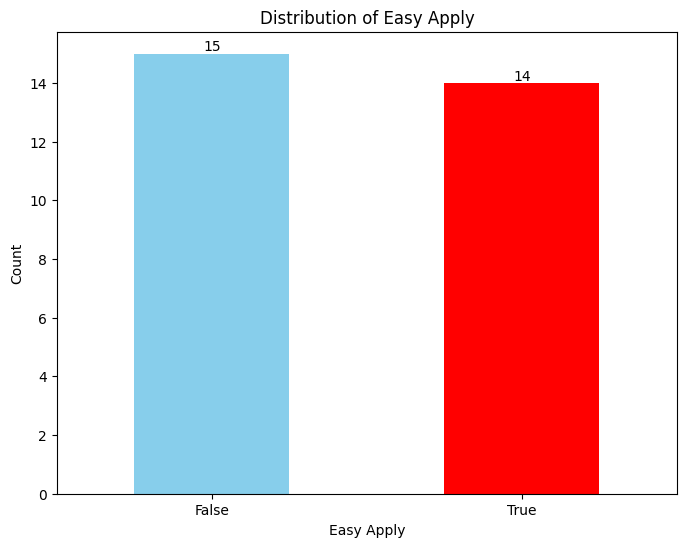

In [ ]:
value_counts = data['Easy Apply'].value_counts()
plt.figure(figsize=(8, 6))
bars = value_counts.plot(kind='bar', color=['skyblue', 'red'])
plt.title('Distribution of Easy Apply')
plt.xlabel('Easy Apply')
plt.ylabel('Count')
plt.xticks([1, 0], ['True', 'False'], rotation=0)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom')

plt.show()

In [ ]:
data['Location'].str.lower().str.replace(",","").str.rstrip("in")

0             india
1        new yorkny
2        new yorkny
3            india 
4     australia aus
5             india
6        new yorkny
7     australia aus
8        new yorkny
9             india
10            india
11            india
12            india
13    australia aus
14    australia aus
15    australia aus
16            india
17       new yorkny
18       new yorkny
19       new yorkny
20       new yorkny
21       new yorkny
22       new yorkny
23       new yorkny
24       new yorkny
25    australia aus
26            india
27            india
28    australia aus
Name: Location, dtype: object

In [ ]:
data['Location'].astype

<bound method NDFrame.astype of 0          India,In
1       New York,Ny
2       New York,Ny
3          India In
4     Australia Aus
5          India,In
6       New York,Ny
7     Australia Aus
8       New York,Ny
9          India,In
10         India,In
11         India,In
12         India,In
13    Australia Aus
14    Australia Aus
15    Australia Aus
16         India,In
17      New York,Ny
18      New York,Ny
19      New York,Ny
20      New York,Ny
21      New York,Ny
22      New York,Ny
23      New York,Ny
24      New York,Ny
25    Australia Aus
26         India,In
27         India,In
28    Australia Aus
Name: Location, dtype: object>

count    21.000000
mean      4.895238
std       1.686557
min       1.400000
25%       3.500000
50%       5.300000
75%       5.700000
max       7.800000
Name: Rating, dtype: float64


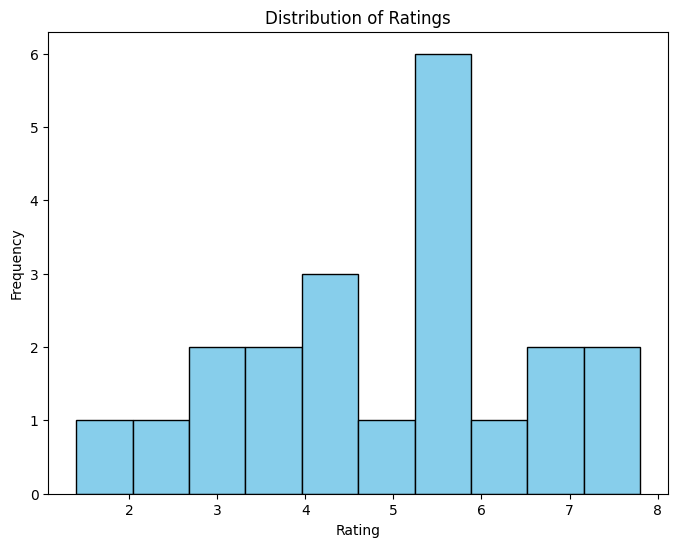

In [ ]:
replace_values = [-1, 0, None, '']
data['Rating'] = data['Rating'].apply(lambda x: np.nan if x in replace_values else x)
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
print(data['Rating'].describe())
plt.figure(figsize=(8, 6))
plt.hist(data['Rating'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

count    29.000000
mean     39.034483
std      13.973145
min      13.000000
25%      32.000000
50%      39.000000
75%      44.000000
max      66.000000
Name: Age, dtype: float64


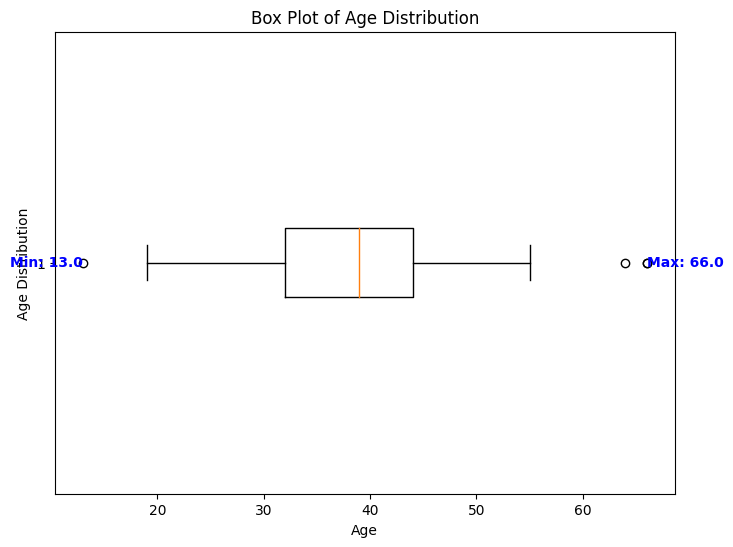

In [ ]:
print(data['Age'].describe())
plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'], vert=False)
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Age Distribution')
min_value = data['Age'].min()
max_value = data['Age'].max()
plt.text(min_value, 1, f'Min: {min_value}', ha='right', va='center', color='blue', fontweight='bold')
plt.text(max_value, 1, f'Max: {max_value}', ha='left', va='center', color='blue', fontweight='bold')
plt.show()

In [ ]:
text_columns = ['Location']
special_characters = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+']
for column in text_columns:

    for index, value in data[column].items():
        if any(char in special_characters for char in str(value)):
            print(f"Column '{column}' at index {index} contains special characters that may need cleaning: {value}")


In [ ]:
data['Location'] = data['Location'].str.replace(r'[^a-zA-Z0-9\s]', '')
print(data['Location'])

0           IndiaIn
1        New YorkNy
2        New YorkNy
3          India In
4     Australia Aus
5           IndiaIn
6        New YorkNy
7     Australia Aus
8        New YorkNy
9           IndiaIn
10          IndiaIn
11          IndiaIn
12          IndiaIn
13    Australia Aus
14    Australia Aus
15    Australia Aus
16          IndiaIn
17       New YorkNy
18       New YorkNy
19       New YorkNy
20       New YorkNy
21       New YorkNy
22       New YorkNy
23       New YorkNy
24       New YorkNy
25    Australia Aus
26          IndiaIn
27          IndiaIn
28    Australia Aus
Name: Location, dtype: object


<ipython-input-36-e6513899097b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Location'] = data['Location'].str.replace(r'[^a-zA-Z0-9\s]', '')


In [ ]:
for index, row in data.iterrows():
    established_year = row['Established']
    company_age = 2023 - established_year  # Assuming the current year is 2023

    if company_age != row['Age']:
        print(f"Data integrity issue at index {index}: Established year ({established_year}) does not align with Age ({row['Age']})")


Data integrity issue at index 0: Established year (1999.0) does not align with Age (44.0)
Data integrity issue at index 1: Established year (2002.0) does not align with Age (66.0)
Data integrity issue at index 2: Established year (nan) does not align with Age (39.0)
Data integrity issue at index 3: Established year (1988.0) does not align with Age (64.0)
Data integrity issue at index 4: Established year (2002.0) does not align with Age (25.0)
Data integrity issue at index 5: Established year (1999.0) does not align with Age (44.0)
Data integrity issue at index 6: Established year (nan) does not align with Age (21.0)
Data integrity issue at index 7: Established year (nan) does not align with Age (44.0)
Data integrity issue at index 8: Established year (nan) does not align with Age (35.0)
Data integrity issue at index 9: Established year (nan) does not align with Age (22.0)
Data integrity issue at index 10: Established year (2008.0) does not align with Age (55.0)
Data integrity issue at 

In [ ]:
print(data['Easy Apply'])

0      True
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15    False
16    False
17     True
18     True
19     True
20     True
21    False
22     True
23     True
24    False
25     True
26     True
27    False
28    False
Name: Easy Apply, dtype: bool


In [ ]:
unique_locations = data['Location'].unique()
print(unique_locations)
data['Location'] = data['Location'].str.replace(' ', '')


['IndiaIn' 'New YorkNy' 'India In' 'Australia Aus']


In [ ]:
unique_locations = data['Location'].unique()
for location in unique_locations:
    print(location)


IndiaIn
NewYorkNy
AustraliaAus


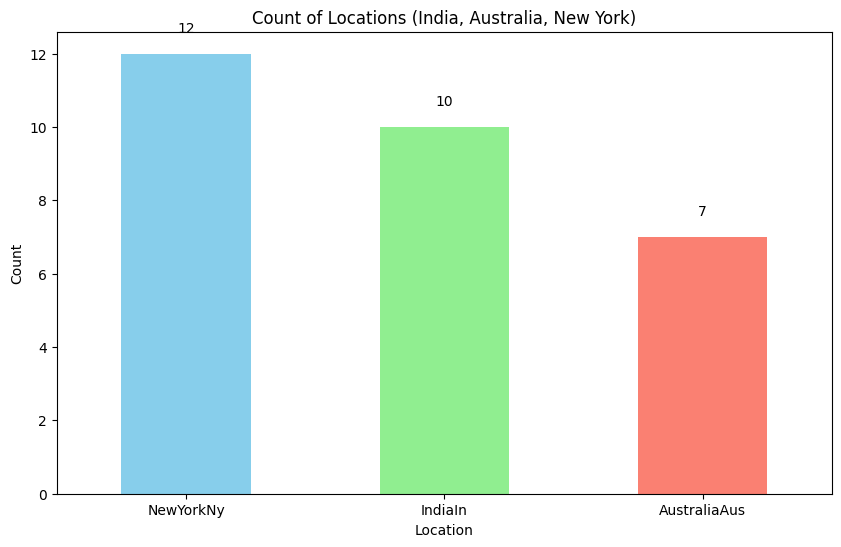

In [ ]:
location_counts = data['Location'].value_counts()
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Count of Locations (India, Australia, New York)')
plt.xlabel('Location')
plt.ylabel('Count')
for i, count in enumerate(location_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
location_df = pd.get_dummies(data['Location'], prefix='Location')
df_encoded = pd.concat([data, location_df], axis=1)
df_encoded.drop('Location', axis=1, inplace=True)
print(df_encoded.head())

   Index   Age Salary  Rating  Established  Easy Apply  Min Salary  \
0      0  44.0  44-99     5.4       1999.0        True          44   
1      1  66.0  55-66     3.5       2002.0        True          55   
2      2  39.0  77-89     NaN          NaN       False          77   
3      3  64.0  44-99     4.4       1988.0       False          44   
4      4  25.0  44-99     6.4       2002.0       False          44   

   Max Salary  Average Salary Standardized Location  Location_AustraliaAus  \
0          99            71.5                 India                      0   
1          66            60.5              New York                      0   
2          89            83.0              New York                      0   
3          99            71.5                 India                      0   
4          99            71.5             Australia                      1   

   Location_IndiaIn  Location_NewYorkNy  
0                 1                   0  
1                 0       

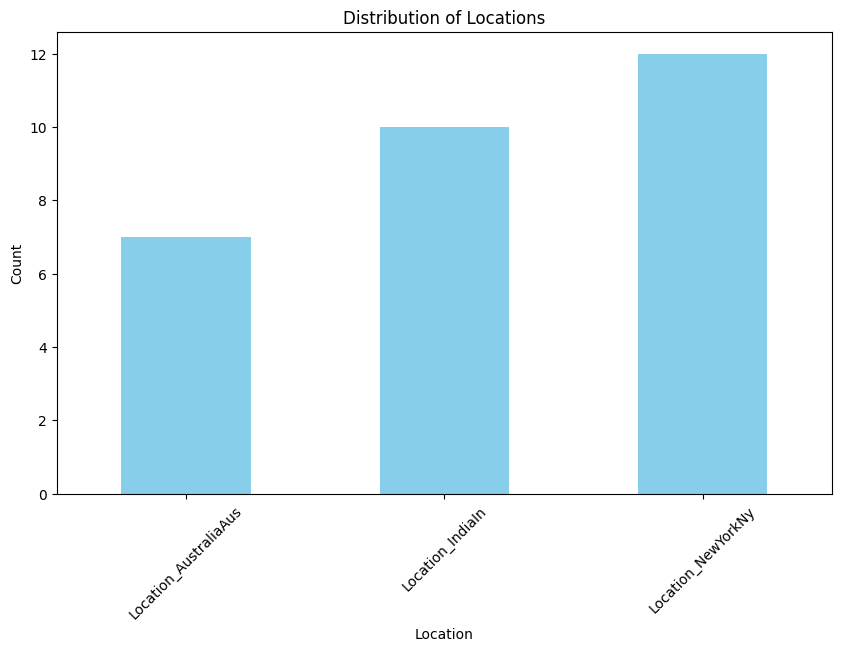

In [ ]:
location_counts = df_encoded.filter(regex='^Location_').sum()
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


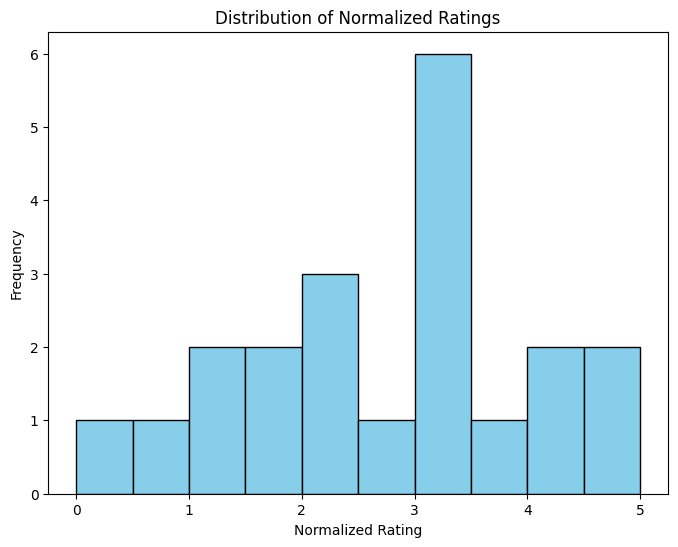

In [ ]:
min_rating = data['Rating'].min()
max_rating = data['Rating'].max()
data['Normalized_Rating'] = ((data['Rating'] - min_rating) / (max_rating - min_rating)) * 5
plt.figure(figsize=(8, 6))
plt.hist(data['Normalized_Rating'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Normalized Ratings')
plt.xlabel('Normalized Rating')
plt.ylabel('Frequency')
plt.show()


# What questions you can find in dataset 2(chipotle)?
Before you actually answer these questions i will assume you have performed data cleaning.

1. Quantity of each item? (Top 5 itmes available in store)
2. which is most ordered item in choice_description?
3. What is total order count?
4. What is reveneu?
5. what are number of orders?
6. Whta is average revenue amount per order?
7. How many different items are sold?
8. what is revenue from each product?


1. Find the unique items
2. Find total cost and quantity of every unique items
3. Find the average of every unique item
4. Replace the items if abnormal with avg







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file = '/content/chipotle.tsv'
ch_data = pd.read_csv(file, sep= '\t')

In [ ]:
missing = ch_data.isnull().sum()
print(missing)
ch_data['choice_description'].fillna('Unknown', inplace=True)
print("\n After handling missing values:")
print(ch_data.isnull().sum())

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

 After handling missing values:
order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64


In [ ]:
print(ch_data.dtypes)
ch_data['item_price'] = ch_data['item_price'].str.replace('$', '').astype(float)
print("\nAfter adjusting data types:")
print(ch_data.dtypes)

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

After adjusting data types:
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


<ipython-input-58-201cdb8dd580>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ch_data['item_price'] = ch_data['item_price'].str.replace('$', '').astype(float)


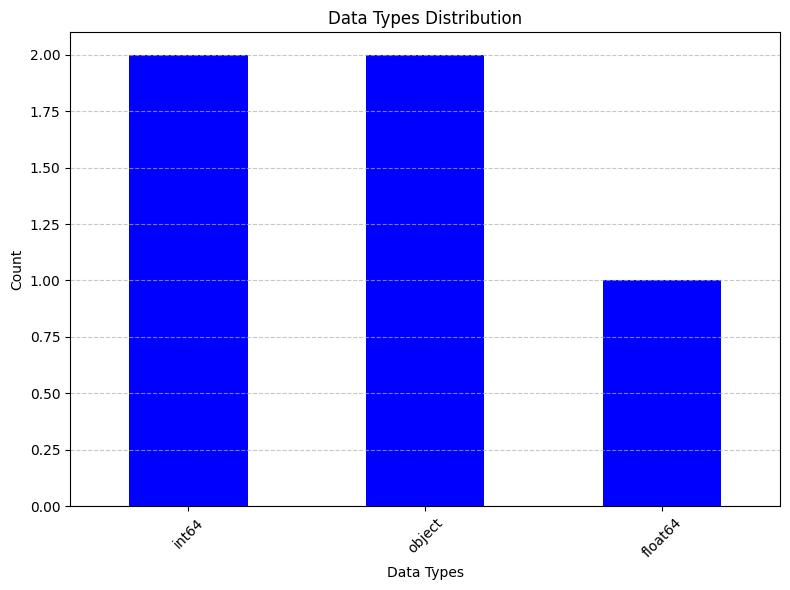

In [ ]:
dtypes_counts = ch_data.dtypes.value_counts()

plt.figure(figsize=(8, 6))
dtypes_counts.plot(kind='bar', color='blue')
plt.title('Data Types Distribution')
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
duplicate_entries = ch_data[ch_data.duplicated()]
print("Number of Duplicated Entries:", len(duplicate_entries))

Number of Duplicated Entries: 59


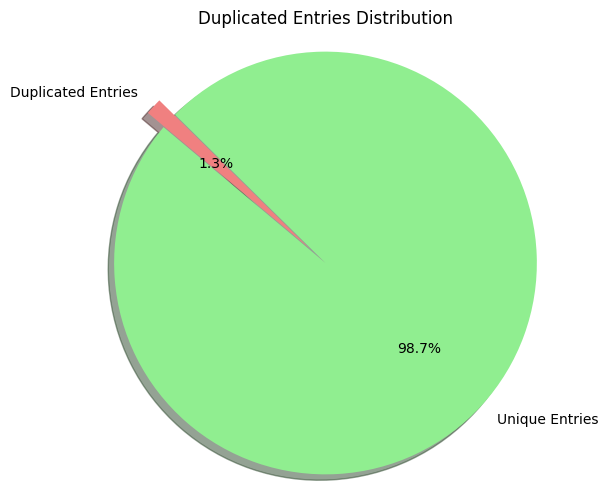

In [ ]:
labels = ['Unique Entries', 'Duplicated Entries']
sizes = [len(ch_data) - len(duplicate_entries), len(duplicate_entries)]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Duplicated Entries Distribution')
plt.axis('equal')
plt.show()

In [ ]:
ch_data.drop_duplicates(inplace=True)
print("\nAfter Removing Duplicates:")
print("Number of Unique Entries:", len(ch_data))


After Removing Duplicates:
Number of Unique Entries: 4563



Summary Statistics:
          quantity   item_price
count  4563.000000  4563.000000
mean      1.076704     7.490083
std       0.412739     4.244155
min       1.000000     1.090000
25%       1.000000     3.750000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000


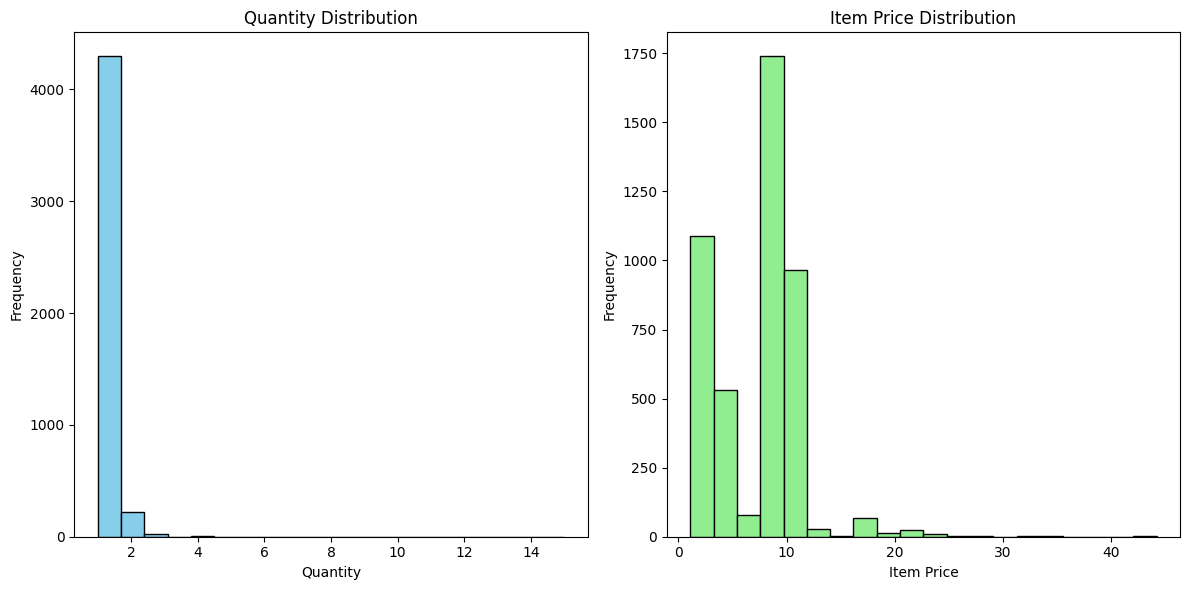

In [ ]:
print("\nSummary Statistics:")
print(ch_data[['quantity', 'item_price']].describe())


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ch_data['quantity'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
ch_data['item_price'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title('Item Price Distribution')
plt.xlabel('Item Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

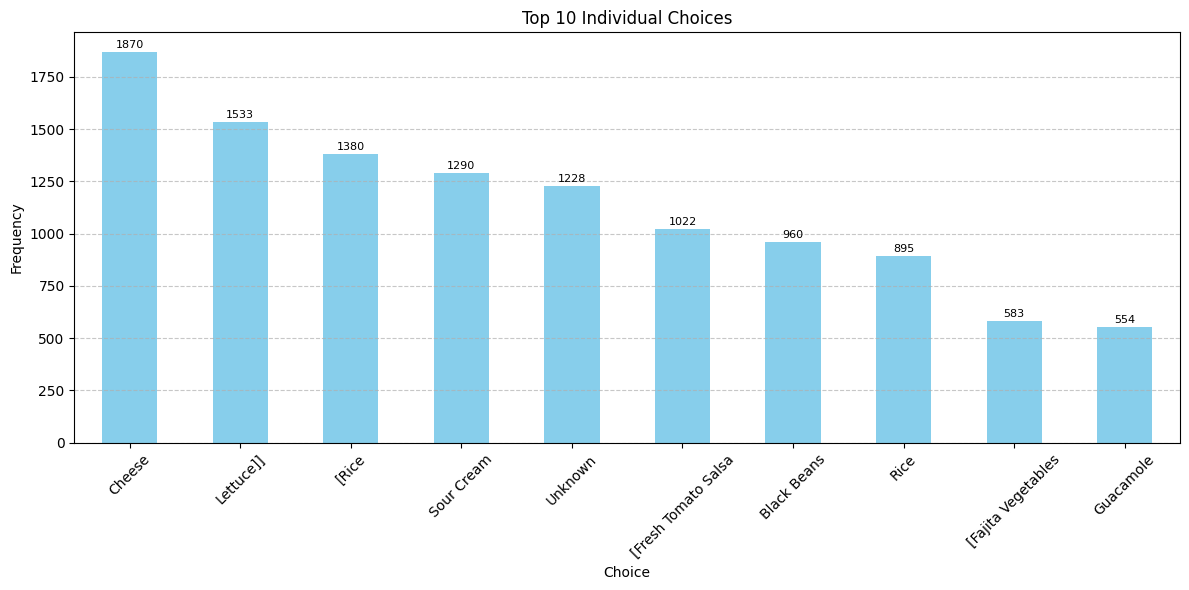

In [ ]:
choices = ch_data['choice_description'].str.split(', ')
choices_df = choices.explode().reset_index(drop=True)

plt.figure(figsize=(12, 6))
top_choices = choices_df.value_counts().head(10)
top_choices.plot(kind='bar', color='skyblue')

plt.title('Top 10 Individual Choices')
plt.xlabel('Choice')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(top_choices):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
import re

special_characters = r'[^a-zA-Z0-9\s]'  # Define a pattern for special characters
has_special_characters = ch_data['item_name'].str.contains(special_characters, regex=True)

print("Rows with Special Characters in Item Name:")
print(ch_data[has_special_characters]['item_name'])

ch_data['item_name'] = ch_data['item_name'].str.replace(special_characters, ' ')

ch_data['item_name'] = ch_data['item_name'].str.lower()

print("\nAfter Handling Special Characters:")
print(ch_data['item_name'].head(10))

Rows with Special Characters in Item Name:
3       Chips and Tomatillo-Green Chili Salsa
15      Chips and Tomatillo-Green Chili Salsa
30      Chips and Tomatillo-Green Chili Salsa
113     Chips and Tomatillo-Green Chili Salsa
133     Chips and Tomatillo-Green Chili Salsa
                        ...                  
3810    Chips and Tomatillo-Green Chili Salsa
3871    Chips and Tomatillo-Green Chili Salsa
3905       Chips and Roasted Chili-Corn Salsa
4007    Chips and Tomatillo-Green Chili Salsa
4088      Chips and Tomatillo-Red Chili Salsa
Name: item_name, Length: 68, dtype: object

After Handling Special Characters:
0             chips and fresh tomato salsa
1                                     izze
2                         nantucket nectar
3    chips and tomatillo green chili salsa
4                             chicken bowl
5                             chicken bowl
6                            side of chips
7                            steak burrito
8                         st

<ipython-input-67-fc6808ba7702>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  ch_data['item_name'] = ch_data['item_name'].str.replace(special_characters, ' ')


In [ ]:
unique_order_ids = ch_data['order_id'].nunique()
total_order_ids = ch_data.shape[0]

print("Number of Unique Order IDs:", unique_order_ids)
print("Total Order IDs:", total_order_ids)

non_numeric_order_ids = ch_data[~ch_data['order_id'].astype(str).str.isdigit()]['order_id']
print("\nNon-Numeric or Irregularly Formatted Order IDs:")
print(non_numeric_order_ids)


Number of Unique Order IDs: 1834
Total Order IDs: 4563

Non-Numeric or Irregularly Formatted Order IDs:
Series([], Name: order_id, dtype: int64)



Item Name After Standardization:
                                  item_name  \
0              chips and fresh tomato salsa   
1                                      izze   
2                          nantucket nectar   
3     chips and tomatillo green chili salsa   
4                              chicken bowl   
...                                     ...   
4617                          steak burrito   
4618                          steak burrito   
4619                     chicken salad bowl   
4620                     chicken salad bowl   
4621                     chicken salad bowl   

                     item_name_standardized  
0              chips and fresh tomato salsa  
1                                      izze  
2                          nantucket nectar  
3     chips and tomatillo green chili salsa  
4                              chicken bowl  
...                                     ...  
4617                          steak burrito  
4618                          ste

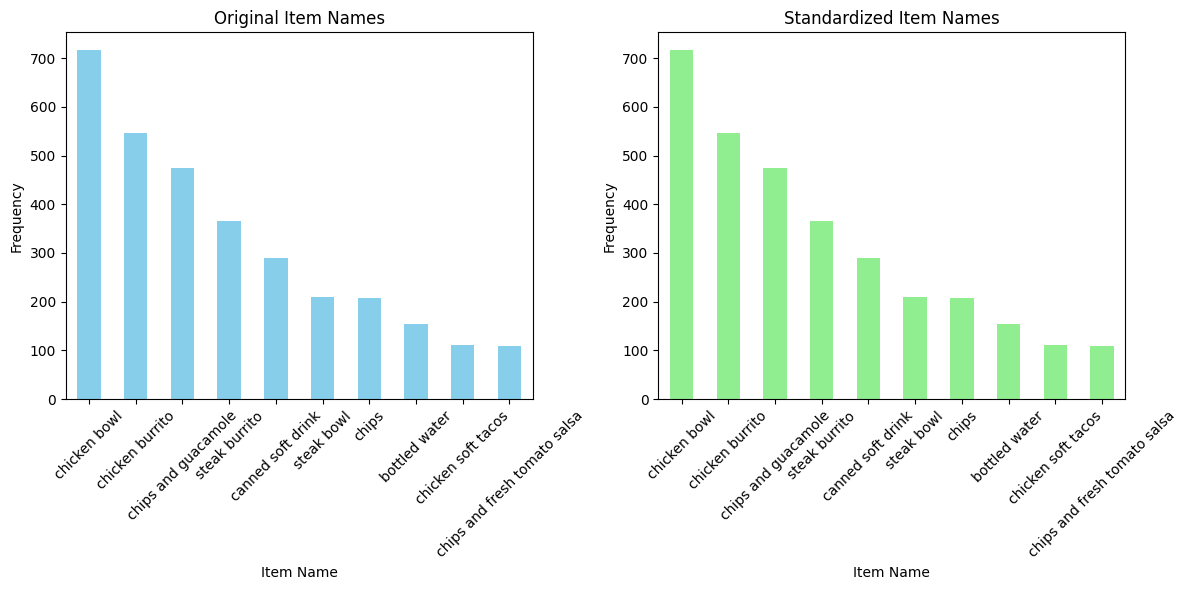

In [ ]:
item_name_variations = ch_data['item_name'].value_counts()


name_mapping = {
    'Chips and Fresh Tomato Salsa': 'Chips and Salsa',
    'Chips and Tomatillo-Green Chili Salsa': 'Chips and Salsa',
    'Chips and Guacamole': 'Chips and Guac',
    'Chicken Bowl': 'Chicken Burrito Bowl',
    'Side of Chips': 'Chips',

}


ch_data['item_name_standardized'] = ch_data['item_name'].replace(name_mapping)


print("\nItem Name After Standardization:")
print(ch_data[['item_name', 'item_name_standardized']])


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
item_name_variations.head(10).plot(kind='bar', color='skyblue')
plt.title('Original Item Names')
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
ch_data['item_name_standardized'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Standardized Item Names')
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


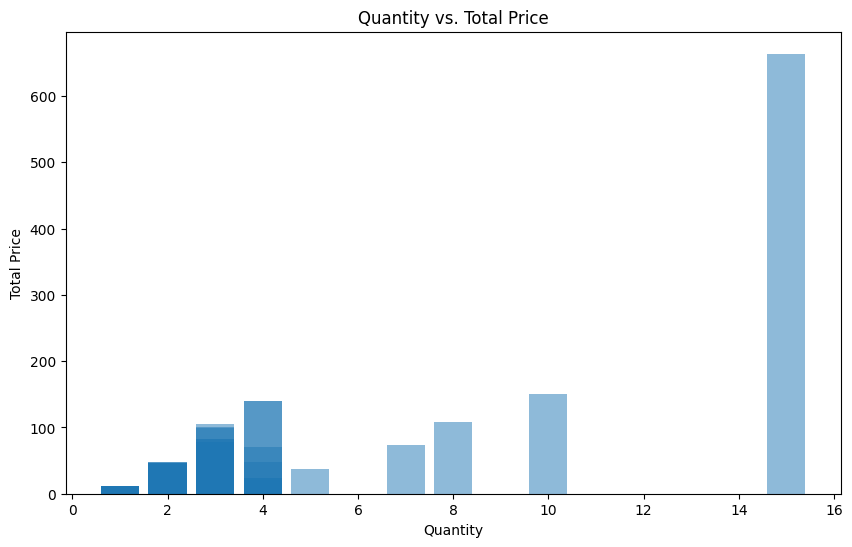

Rows with Zero or Negative Values:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price, item_name_standardized, Total Price]
Index: []


In [ ]:
ch_data['Total Price'] = ch_data['quantity'] * ch_data['item_price']


plt.figure(figsize=(10, 6))
plt.bar(ch_data['quantity'], ch_data['Total Price'], alpha=0.5)
plt.title('Quantity vs. Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

zero_negative_values = ch_data[(ch_data['quantity'] <= 0) | (ch_data['item_price'] <= 0)]
print("Rows with Zero or Negative Values:")
print(zero_negative_values)

In [ ]:
grouped_data = ch_data.groupby(['item_name', 'choice_description']).agg(
    Total_Quantity=('quantity', 'sum'),
    Total_Price=('item_price', lambda x: (x * ch_data['quantity']).sum())
).reset_index()

merged_df = pd.merge(ch_data, grouped_data, on=['item_name', 'choice_description'], suffixes=('', '_agg'))

data_integrity_check = merged_df[
    (merged_df['quantity'] != merged_df['Total_Quantity']) |
    (merged_df['item_price'] != merged_df['Total_Price'])
]

print("Rows with Quantity or Price Mismatch:")
print(data_integrity_check)

Rows with Quantity or Price Mismatch:
      order_id  quantity                     item_name  \
0            1         1  chips and fresh tomato salsa   
1           13         1  chips and fresh tomato salsa   
2           25         1  chips and fresh tomato salsa   
3           39         1  chips and fresh tomato salsa   
4           82         1  chips and fresh tomato salsa   
...        ...       ...                           ...   
4478      1719         2                 steak burrito   
4514      1764         2                  chicken bowl   
4515      1764         2                    steak bowl   
4559      1830         1                 steak burrito   
4560      1833         1                 steak burrito   

                                     choice_description  item_price  \
0                                               Unknown        2.39   
1                                               Unknown        2.39   
2                                               Unkn

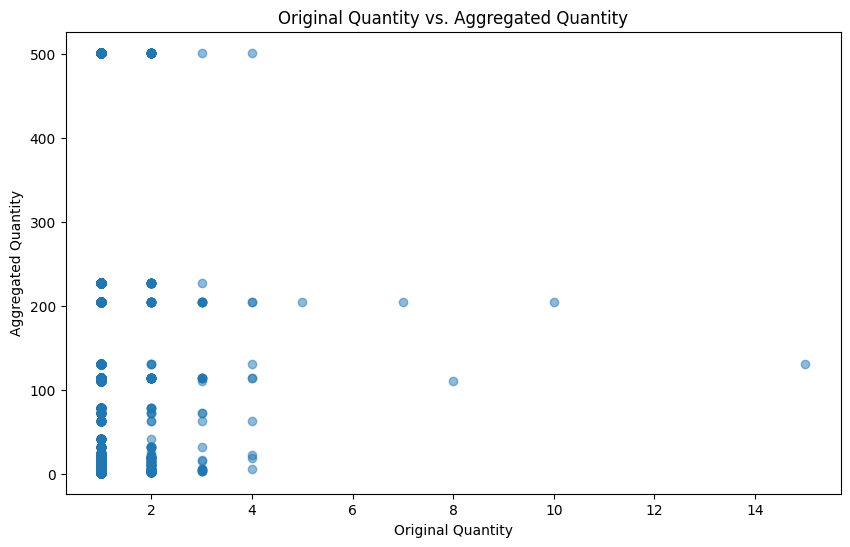

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['quantity'], merged_df['Total_Quantity'], alpha=0.5)
plt.title('Original Quantity vs. Aggregated Quantity')
plt.xlabel('Original Quantity')
plt.ylabel('Aggregated Quantity')
plt.show()

In [ ]:
output_file = '/content/chipotle.tsv'
ch_data.to_csv(output_file, index=False, sep=',')

print(f"The cleaned dataset has been saved to: {output_file}")


The cleaned dataset has been saved to: /content/chipotle.tsv


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ch_data['Item Name Encoded'] = label_encoder.fit_transform(ch_data['item_name'])
ch_data

,order_id,quantity,item_name,choice_description,item_price,item_name_standardized,Total Price,Item Name Encoded
0,1,1,chips and fresh tomato salsa,Unknown,2.39,chips and fresh tomato salsa,2.39,24
1,1,1,izze,[Clementine],3.39,izze,3.39,31
2,1,1,nantucket nectar,[Apple],3.39,nantucket nectar,3.39,32
3,1,1,chips and tomatillo green chili salsa,Unknown,2.39,chips and tomatillo green chili salsa,2.39,28
4,2,2,chicken bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,chicken bowl,33.96,17
...,...,...,...,...,...,...,...,...
4617,1833,1,steak burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,steak burrito,11.75,36
4618,1833,1,steak burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,steak burrito,11.75,36
4619,1834,1,chicken salad bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,chicken salad bowl,11.25,21
4620,1834,1,chicken salad bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,chicken salad bowl,8.75,21
